# Построение модели машинного обучения для определения месторождений нефти, разработка которых принесет наибольшую прибыль

## 1 Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)

    Загрузим таблицы с данными по трем регионам

### Первый регион

In [2]:
df_1 = pd.read_csv('geo_data_0.csv')
display(df_1)

print(df_1.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


### Второй регион

In [3]:
df_2 = pd.read_csv('geo_data_1.csv')
display(df_2)

print(df_2.info())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


### Третий регион

In [4]:
df_3 = pd.read_csv('geo_data_2.csv')
display(df_3)

print(df_3.info())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


<font size="4"><b>Описание данных в таблицах</b></font>

<b>Признаки:</b>

•	id — уникальный идентификатор скважины;

•	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

•	product — объём запасов в скважине (тыс. баррелей).

<b>Вывод</b>

После изучения и подготовки данных можно сказать:

- 3 таблицы данных соответствуют данным о трех регионах. Каждая таблица включает 100 000 строк данных о скважинах, а также  включает 5 столбцов;

- пропусков во всех трех таблицах нет;

- данные приведены к нужным типам данных;

- таблицы будут включать 2 набора данных: признаки - столбцы 'id', 'f0', 'f1' и 'f2', а также целевой признак столбец 'product';

- в данном случае для обучения подойдет модель линейная регрессия.

## 2 Обучение и проверка модели для каждого региона

### 2.1 Первый регион

#### Разобьем данные на обучающую и валидационную выборки

In [5]:
features_1 = df_1.drop(['id', 'product'], axis=1)
target_1 = df_1['product']

In [6]:
# разбиение на тренировочную и валидационную выборки
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=.25, random_state=12345)

#### Обучим модель и сделайте предсказания на валидационной выборке

In [7]:
# обучение модели линейной регрессии и проведем предсказание на валидационной выборке
model = LinearRegression()
model.fit(features_train_1, target_train_1)
predict_valid_1 = model.predict(features_valid_1)
display(predict_valid_1)

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

#### Подсчитаем средний запас предсказанного сырья и RMSE модели

In [8]:
# подсчитаем средний запас
reserve_predict_1 = predict_valid_1.mean()
print('Средний запас предсказанного сырья в первом регионе:', reserve_predict_1)
print('Средний запас сырья в первом регионе по таблице:', df_1['product'].mean())

Средний запас предсказанного сырья в первом регионе: 92.59256778438038
Средний запас сырья в первом регионе по таблице: 92.50000000000001


In [9]:
# посчитаем RMSE модели
rmse_1 = mean_squared_error(target_valid_1, predict_valid_1) ** 0.5
print('RMSE:', rmse_1)

# посчитаем среднее абсолютное отклонение модели
mae_1 = mean_absolute_error(target_valid_1, predict_valid_1)
print('MAE:', mae_1)

RMSE: 37.5794217150813
MAE: 30.919600777151313


In [10]:
# посчитаем метрику R2
r2_1 = r2_score(target_valid_1, predict_valid_1)
print('R2:', r2_1)

R2: 0.27994321524487786


### 2.2 Второй регион

#### Разобьем данные на обучающую и валидационную выборки

In [11]:
# разбиение данных на признаки и целевой признак
features_2 = df_2.drop(['id', 'product'], axis=1)
target_2 = df_2['product']

In [12]:
# разбиение на тренировочную и валидационную выборки
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=.25, random_state=12345)

#### Обучим модель и сделаем предсказания на валидационной выборке

In [13]:
# обучение модели линейной регрессии и проведем предсказание на валидационной выборке
model = LinearRegression()
model.fit(features_train_2, target_train_2)
predict_valid_2 = model.predict(features_valid_2)
display(predict_valid_2)

array([ 82.66331365,  54.43178616,  29.74875995, ..., 137.87934053,
        83.76196568,  53.95846638])

#### Подсчитаем средний запас предсказанного сырья и RMSE модели

In [14]:
# подсчитаем средний запас
reserve_predict_2 = predict_valid_2.mean()
print('Средний запас предсказанного сырья во втором регионе:', reserve_predict_2)
print('Средний запас сырья во втором регионе по таблице:', df_2['product'].mean())

Средний запас предсказанного сырья во втором регионе: 68.72854689544602
Средний запас сырья во втором регионе по таблице: 68.82500000000002


In [15]:
# посчитаем RMSE модели
rmse_2 = mean_squared_error(target_valid_2, predict_valid_2) ** 0.5
print('RMSE:',rmse_2)

# посчитаем среднее абсолютное отклонение модели
mae_2 = mean_absolute_error(target_valid_2, predict_valid_2)
print('MAE:', mae_2)

RMSE: 0.8930992867756155
MAE: 0.718766244212475


In [16]:
# посчитаем метрику R2
r2_2 = r2_score(target_valid_2, predict_valid_2)
print('R2:', r2_2)

R2: 0.9996233978805127


### 2.3 Третий регион

#### Разобьем данные на обучающую и валидационную выборки

In [17]:
# разбиение данных на признаки и целевой признак
features_3 = df_3.drop(['id', 'product'], axis=1)
target_3 = df_3['product']

In [18]:
# разбиение на тренировочную и валидационную выборки
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
    features_3, target_3, test_size=.25, random_state=12345)

#### Обучим модель и сделайте предсказания на валидационной выборке

In [19]:
# обучение модели линейной регрессии и проведем предсказание на валидационной выборке
model = LinearRegression()
model.fit(features_train_3, target_train_3)
predict_valid_3 = model.predict(features_valid_3)

#### Подсчитаем средний запас предсказанного сырья и RMSE модели

In [20]:
# подсчитаем средний запас
reserve_predict_3 = predict_valid_3.mean()
print('Средний запас предсказанного сырья в третьем регионе:', reserve_predict_3)
print('Средний запас сырья в третьем регионе по таблице:', df_3['product'].mean())

Средний запас предсказанного сырья в третьем регионе: 94.96504596800489
Средний запас сырья в третьем регионе по таблице: 95.00000000000004


In [21]:
# посчитаем RMSE модели
rmse_3 = mean_squared_error(target_valid_3, predict_valid_3) ** 0.5
print('RMSE:', rmse_3)

# посчитаем среднее абсолютное отклонение модели
mae_3 = mean_absolute_error(target_valid_3, predict_valid_3)
print('MAE:', mae_3)

RMSE: 40.02970873393434
MAE: 32.792652105481814


In [22]:
# посчитаем метрику R2
r2_3 = r2_score(target_valid_3, predict_valid_3)
print('R2:', r2_3)

R2: 0.20524758386040443


<b>Вывод</b>

Входе обучения и предсказаний модели Линейная регресия на данных 3-х регионов, получены результаты:

- для каждого региона просчитаны метрики RMSE, MAE и R2;

- для первого и третьего регионов метрики RMSE и MAE выдали довольно большие ошибки, при этом для второго региона RMSE и MAE выдали очень маленькую ошибку. Модель Линейная регрессия в расчетах для второго региона показала качество близкое к идеальной модели, это же подствердила метрика R2 практически равная 1 (точнее - 0.9996). R2 для моделей, использовавшихся для первого и третьего региона говорят о том, что модель далека от идеальной, но она значительно лучше средного;

- несмотря на большие значения ошибок RMSE и MAE и достаточно большое отличие для первой и третьей моделей значений ответов и предсказаний, значения средних запасов предсказанного сырья очень близки к средним значения запасов сырья в целевом признаке данных;

- расчеты RMSE и MAE показали, что нахождение средней абсолютной ошибки (MAE) точнее корня из средней квадратчной ошибки (RMSE).

## 3 Подготовка к расчёту прибыли

### 3.1 Сохраним ключевые значения для расчётов в отдельных переменных

In [23]:
EXPENSES = 10**10 # бюджет на разработку скважин в регионе, он же порог безубыточности с 200 скважин
SELECT_WELL = 200 # количество выбираемых скважин
CRUDE_PRICE = 450_000 # стоимость 1 единицы сырья

### 3.2 Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. 

Для расчета среднего объема сырья для безубыточной разработки новой скважины проведем вычисления:

1. Доход от 200 выбранных скважин должен быть не меньше 10 млрд. руб.;
2. Соответственно доход с одной скважины должен быть в среднем не менее 10**9 / 200 = 50 млн. руб.
3. Средний объем сырья получаемый с одной скважины не менее 50 млн. руб. / 450 тыс. руб. = 111.1111 тыс. баррелей

In [24]:
mean_income_well = EXPENSES / SELECT_WELL / CRUDE_PRICE
print(f'Достаточный объём сырья для безубыточной разработки новой скважины: {mean_income_well} тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111 тыс. баррелей


<b>Вывод</b>

В данном пункте проведен расчет достаточный объем сырья для безубыточной разработки новой скважины и получено значение 111.1111 тыс. баррелей.
Средний запас предсказанного сырья в первом регионе: 92 тыс. баррелей, во втором регионе: 68 тыс. баррелей, в третьем регионе: 94,9 тыс. баррелей. Ни в одном регионе уровень среднего значения объем сырья с одной скважины не дотягивает до безубыточного уровня.

### 3.3 Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

<b>При написании данной функции будут браться предсказания, проведена их сортировка по убыванию, отобраны 200 лучших скважин по объему ресурса, а затем с помощью формулы подсчитана прибыль с данных 200 скважин.
    
Далее данная функция будет применена к каждому региону.</b>

In [26]:
# функция для расчёта прибыли по выбранным скважинам 
# данная функция будет также использована при прогнозировании техникой Bootstrap
def total_income_target(count_well, target, predictions):
    predictions = pd.Series(predictions).sort_values(ascending=False)
    well_list_target = target[predictions.index][:count_well]
    return sum(well_list_target) * CRUDE_PRICE - EXPENSES

### 3.4 Подсчет прибыли от разработки выбранных скважин в первом регионе

In [27]:
target_valid_1 = target_valid_1.reset_index(drop=True)
target_valid_2 = target_valid_2.reset_index(drop=True)
target_valid_3 = target_valid_3.reset_index(drop=True)

In [28]:
total_income_1 = total_income_target(SELECT_WELL, target_valid_1, predict_valid_1) # использована новая функция
print(f'Прибыль по выбранным скважинам в первом регионе: { total_income_1}')

Прибыль по выбранным скважинам в первом регионе: 3320826043.1398544


### 3.5 Подсчет прибыли от разработки выбранных скважин во втором регионе

In [29]:
#total_income_2 = total_income(select_well, predict_valid_2)

total_income_2 = total_income_target(SELECT_WELL, target_valid_2, predict_valid_2) # использована новая функция
print(f'Прибыль по выбранным скважинам во втором регионе: { total_income_2}')

Прибыль по выбранным скважинам во втором регионе: 2415086696.681551


### 3.6 Подсчет прибыли от разработки выбранных скважин в третьем регионе

In [30]:
#total_income_3 = total_income(select_well, predict_valid_3)

total_income_3 = total_income_target(SELECT_WELL, target_valid_3, predict_valid_3) # использована новая функция
print(f'Прибыль по выбранным скважинам во втором регионе: { total_income_3}')

Прибыль по выбранным скважинам во втором регионе: 2710349963.5998363


<b>Вывод</b>

По результатам подсчета прибыли от разработки скважин <b>лидирует первый регион</b> с максимальной суммарной прибылью отобранных скважин - <b>3.320 млрд. руб</b>.
Наименьшее значение суммарной прибыи отобранных скважин наблюдается во втором регионе со значением - 2.415 млрд. руб.

## 4 Проанализируем возможную прибыль и риски техникой Bootstrap для каждого региона

### 4.1 Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли в каждом регионе

#### Используем функция для расчета прибыли с 200 лучших скважин по значениям в целевом признаке валидационной выборки 

<b>На вход функции подаются целевой признак валидационной выборки (target_valid), предсказания и нужное количество лучших скважин. 
    
В ходе выполнения данной функции будут браться предсказания, проведена их сортировка, отбор 200 скважин из целевого признака валидационной выборки соответствующих индексам 200 лучших скважин по предсказаниям. Затем с помощью формулы будет подсчитана прибыль с данных 200 скважин.
    
Далее данная функция будет применена к каждому региону.</b>

In [31]:
def total_income_target(count_well, target, predictions):
    predictions = pd.Series(predictions).sort_values(ascending=False)
    well_list_target = target[predictions.index][:count_well]
    return sum(well_list_target) * CRUDE_PRICE - EXPENSES

#### Проанализируем прибыли от разработки выбранных скважин в первом регионе

<function matplotlib.pyplot.show(close=None, block=None)>

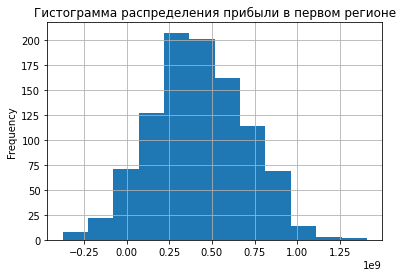

In [32]:
state = RandomState(12345)

total_incomes_1 = [] # массив значений прибыли со всех сэмплов
count_1 = 0 # подсчет количества 0 и отрицательных прибылей в сэмплах
for i in range(1000):
    sub_predict_1 = pd.Series(predict_valid_1).sample(n=500, replace=True, random_state=state)
    sub_target_1 = target_valid_1[sub_predict_1.index]
    total_income_targ_1 = total_income_target(200, sub_target_1, sub_predict_1)
    total_incomes_1.append(total_income_targ_1)
    if total_income_targ_1 <= 0:
        count_1 += 1        

# построим гистограмму распределения прибылей с 1000 сэмплов
total_incomes_1 = pd.Series(total_incomes_1)
total_incomes_1.plot(kind = 'hist', bins=12, grid=True, title='Гистограмма распределения прибыли в первом регионе')
plt.show

#### Проанализируем прибыли от разработки выбранных скважин во втором регионе

<function matplotlib.pyplot.show(close=None, block=None)>

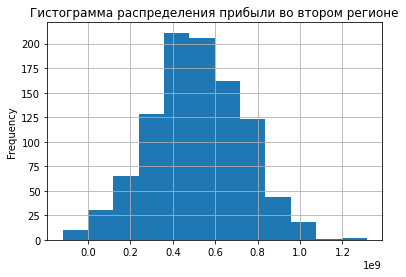

In [33]:
state = RandomState(12345)

total_incomes_2 = [] # массив значений прибыли со всех сэмплов
count_2 = 0 # подсчет количества 0 и отрицательных прибылей в сэмплах
for i in range(1000):
    sub_predict_2 = pd.Series(predict_valid_2).sample(n=500, replace=True, random_state=state)
    sub_target_2 = target_valid_2[sub_predict_2.index]
    total_income_targ_2 = total_income_target(200, sub_target_2, sub_predict_2)
    total_incomes_2.append(total_income_targ_2)
    if total_income_targ_2 <= 0:
        count_2 += 1        

# построим гистограмму распределения прибылей с 1000 сэмплов
total_incomes_2 = pd.Series(total_incomes_2)
total_incomes_2.plot(kind = 'hist', bins=12, grid=True, title='Гистограмма распределения прибыли во втором регионе')
plt.show

#### Проанализируем прибыли от разработки выбранных скважин в третьем регионе

<function matplotlib.pyplot.show(close=None, block=None)>

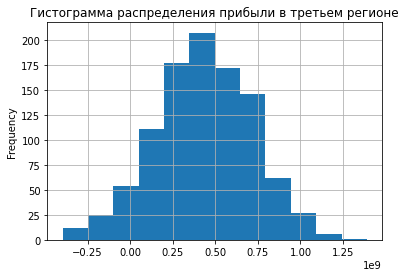

In [34]:
state = RandomState(12345)

total_incomes_3 = [] # массив значений прибыли со всех сэмплов
count_3 = 0 # подсчет количества 0 и отрицательных прибылей в сэмплах
for i in range(1000):
    sub_predict_3 = pd.Series(predict_valid_3).sample(n=500, replace=True, random_state=state)
    sub_target_3 = target_valid_3[sub_predict_3.index]
    total_income_targ_3 = total_income_target(200, sub_target_3, sub_predict_3)
    total_incomes_3.append(total_income_targ_3)
    if total_income_targ_3 <= 0:
        count_3 += 1        

# построим гистограмму распределения прибылей с 1000 сэмплов
total_incomes_3 = pd.Series(total_incomes_3)
total_incomes_3.plot(kind = 'hist', bins=12, grid=True, title='Гистограмма распределения прибыли в третьем регионе')
plt.show

### 4.2 Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков для каждого региона

#### Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков для первого региона

In [35]:
# Найдем среднюю прибыль
total_incomes_mean_1 = total_incomes_1.mean()
print(f'Средняя прибыль с выбранных 200 скважин в первом регионе: { total_incomes_mean_1} руб.')

# Найдем 95%-й доверительный интервал
lower = total_incomes_1.quantile(q=.025)
upper = total_incomes_1.quantile(q=.975)
print(f'95%-й доверительный интервал составляет: {lower} - { upper } руб.')

# Найдем риск убытков (долю убыточных сэмплов)
loss_1 = count_1 / 1000 * 100 # первый способ нахождения риска
loss_1_v = (total_incomes_1 < 0).mean() # второй способ нахождения риска

print(f'Риск убытков при разработке скважин в первом регионе (1-й способ): {loss_1_v} %')
print(f'Риск убытков при разработке скважин в первом регионе (2-й способ): {loss_1_v} %')

Средняя прибыль с выбранных 200 скважин в первом регионе: 425938526.9105928 руб.
95%-й доверительный интервал составляет: -102090094.83793645 - 947976353.3583689 руб.
Риск убытков при разработке скважин в первом регионе (1-й способ): 0.06 %
Риск убытков при разработке скважин в первом регионе (2-й способ): 0.06 %


#### Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков для второго региона

In [41]:
# Найдем среднюю прибыль
total_incomes_mean_2 = total_incomes_2.mean()
print(f'Средняя прибыль с выбранных 200 скважин во втором регионе: { total_incomes_mean_2} руб.')

# Найдем 95%-й доверительный интервал
lower = total_incomes_2.quantile(q=.025)
upper = total_incomes_2.quantile(q=.975)
print(f'95%-й доверительный интервал составляет: {lower} - { upper } руб.')

# Найдем риск убытков (долю убыточных сэмплов)
loss_2 = count_2 / 1000 * 100

print(f'Риск убытков при разработке скважин во втором регионе: {loss_2} %')

Средняя прибыль с выбранных 200 скважин во втором регионе: 515222773.4433127 руб.
95%-й доверительный интервал составляет: 68873225.37051702 - 931547591.2570724 руб.
Риск убытков при разработке скважин во втором регионе: 1.0 %


#### Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков для третьего региона

In [42]:
# Найдем среднюю прибыль
total_incomes_mean_3 = total_incomes_3.mean()
print(f'Средняя прибыль с выбранных 200 скважин в третьем регионе: { total_incomes_mean_3} руб.')

# Найдем 95%-й доверительный интервал
lower = total_incomes_3.quantile(q=.025)
upper = total_incomes_3.quantile(q=.975)
print(f'95%-й доверительный интервал составляет: {lower} - { upper } руб.')

# Найдем риск убытков (долю убыточных сэмплов)
loss_3 = count_3 / 1000 * 100

print(f'Риск убытков при разработке скважин в третьем регионе: {loss_3} %')

Средняя прибыль с выбранных 200 скважин в третьем регионе: 435008362.7827563 руб.
95%-й доверительный интервал составляет: -128880547.32978535 - 969706954.1802661 руб.
Риск убытков при разработке скважин в третьем регионе: 6.4 %


### 5 Предложения по выбору региона для разработки скважин

<font size="4"><b>Предложения и Общий вывод</b></font>

В результате проведенного анализа возможной прибыли и рисков разработки скважин в трех представленных регионах с помощью техники Bootstrap, <b>можно порекомендовать для освоения второй регион</b>.

Данный регион характеризуется наибольшим значением среднего уровеня добычи ресурсов из трех регионов - 515 222 773 руб. (515.2 млн. руб.). Кроме того, риск убытков при разработке скважин в данном регионе имеет наименьшее значение из трех регионов - 1.0 %.